In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
data = pd.read_csv("data/combined_stats.csv", index_col=0)
# Missing column is awards_per (useless)
data = data.rename(columns={'USG%':'USG'})
print(data.columns[0:100])


Index(['Rk_g', 'Player', 'Age_g', 'Team_g', 'Pos_g', 'G_g', 'GS_g', 'MP_g',
       'FG_g', 'FGA_g', 'FG%_g', '3P_g', '3PA_g', '3P%_g', '2P_g', '2PA_g',
       '2P%_g', 'eFG%_g', 'FT_g', 'FTA_g', 'FT%_g', 'ORB_g', 'DRB_g', 'TRB_g',
       'AST_g', 'STL_g', 'BLK_g', 'TOV_g', 'PF_g', 'PTS_g', 'Awards_g',
       'PTS_tot', 'AST_tot', 'TRB_tot', 'STL_tot', 'BLK_tot', 'FT_tot',
       'FTA_tot', 'FG_tot', 'FGA_tot', '3P_tot', 'TOV_tot', 'Fpoints_tot',
       'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', ' Rk', 'Pos_per',
       'Tm', 'G_per', 'MP_per', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Player-additional', 'Rk_per',
       'Team_per', 'Pos', 'G', 'GS_per', 'MP', 'FG_per', 'FGA_per', 'FG%_per',
       '3P_per', '3PA_per', '3P%_per', '2P_per', '2PA_per', '2P%_per',
       'eFG%_per', 'FT_per', 'FTA_per', 'FT%_per', 'ORB_per', 'DRB_per',
       'TRB_per', 'A

## Looking at stats with direct relation to fantasy:
- PTS
- AST
- REB
- STL
- 3PM
- BLK
- FG%
- FT%
- TO

In [24]:
# Removing players who are irrelevant to 12 team fantasy leagues
relevant = data[(data['MP_g'] > 10) & (data['G'] > 35)]
fantasy_related=['Player', 'MP_g', 'Fpoints_avg_G', 'Fpoints_avg_min', 'AST_g','TRB_g', 'STL_g', 'BLK_g', 
                 'FGA_g', 'FG%_g', '3P_g', '3P%_g', 'FT_g', 'FT%_g', 'PTS_g']
base_fantasy = relevant[fantasy_related]

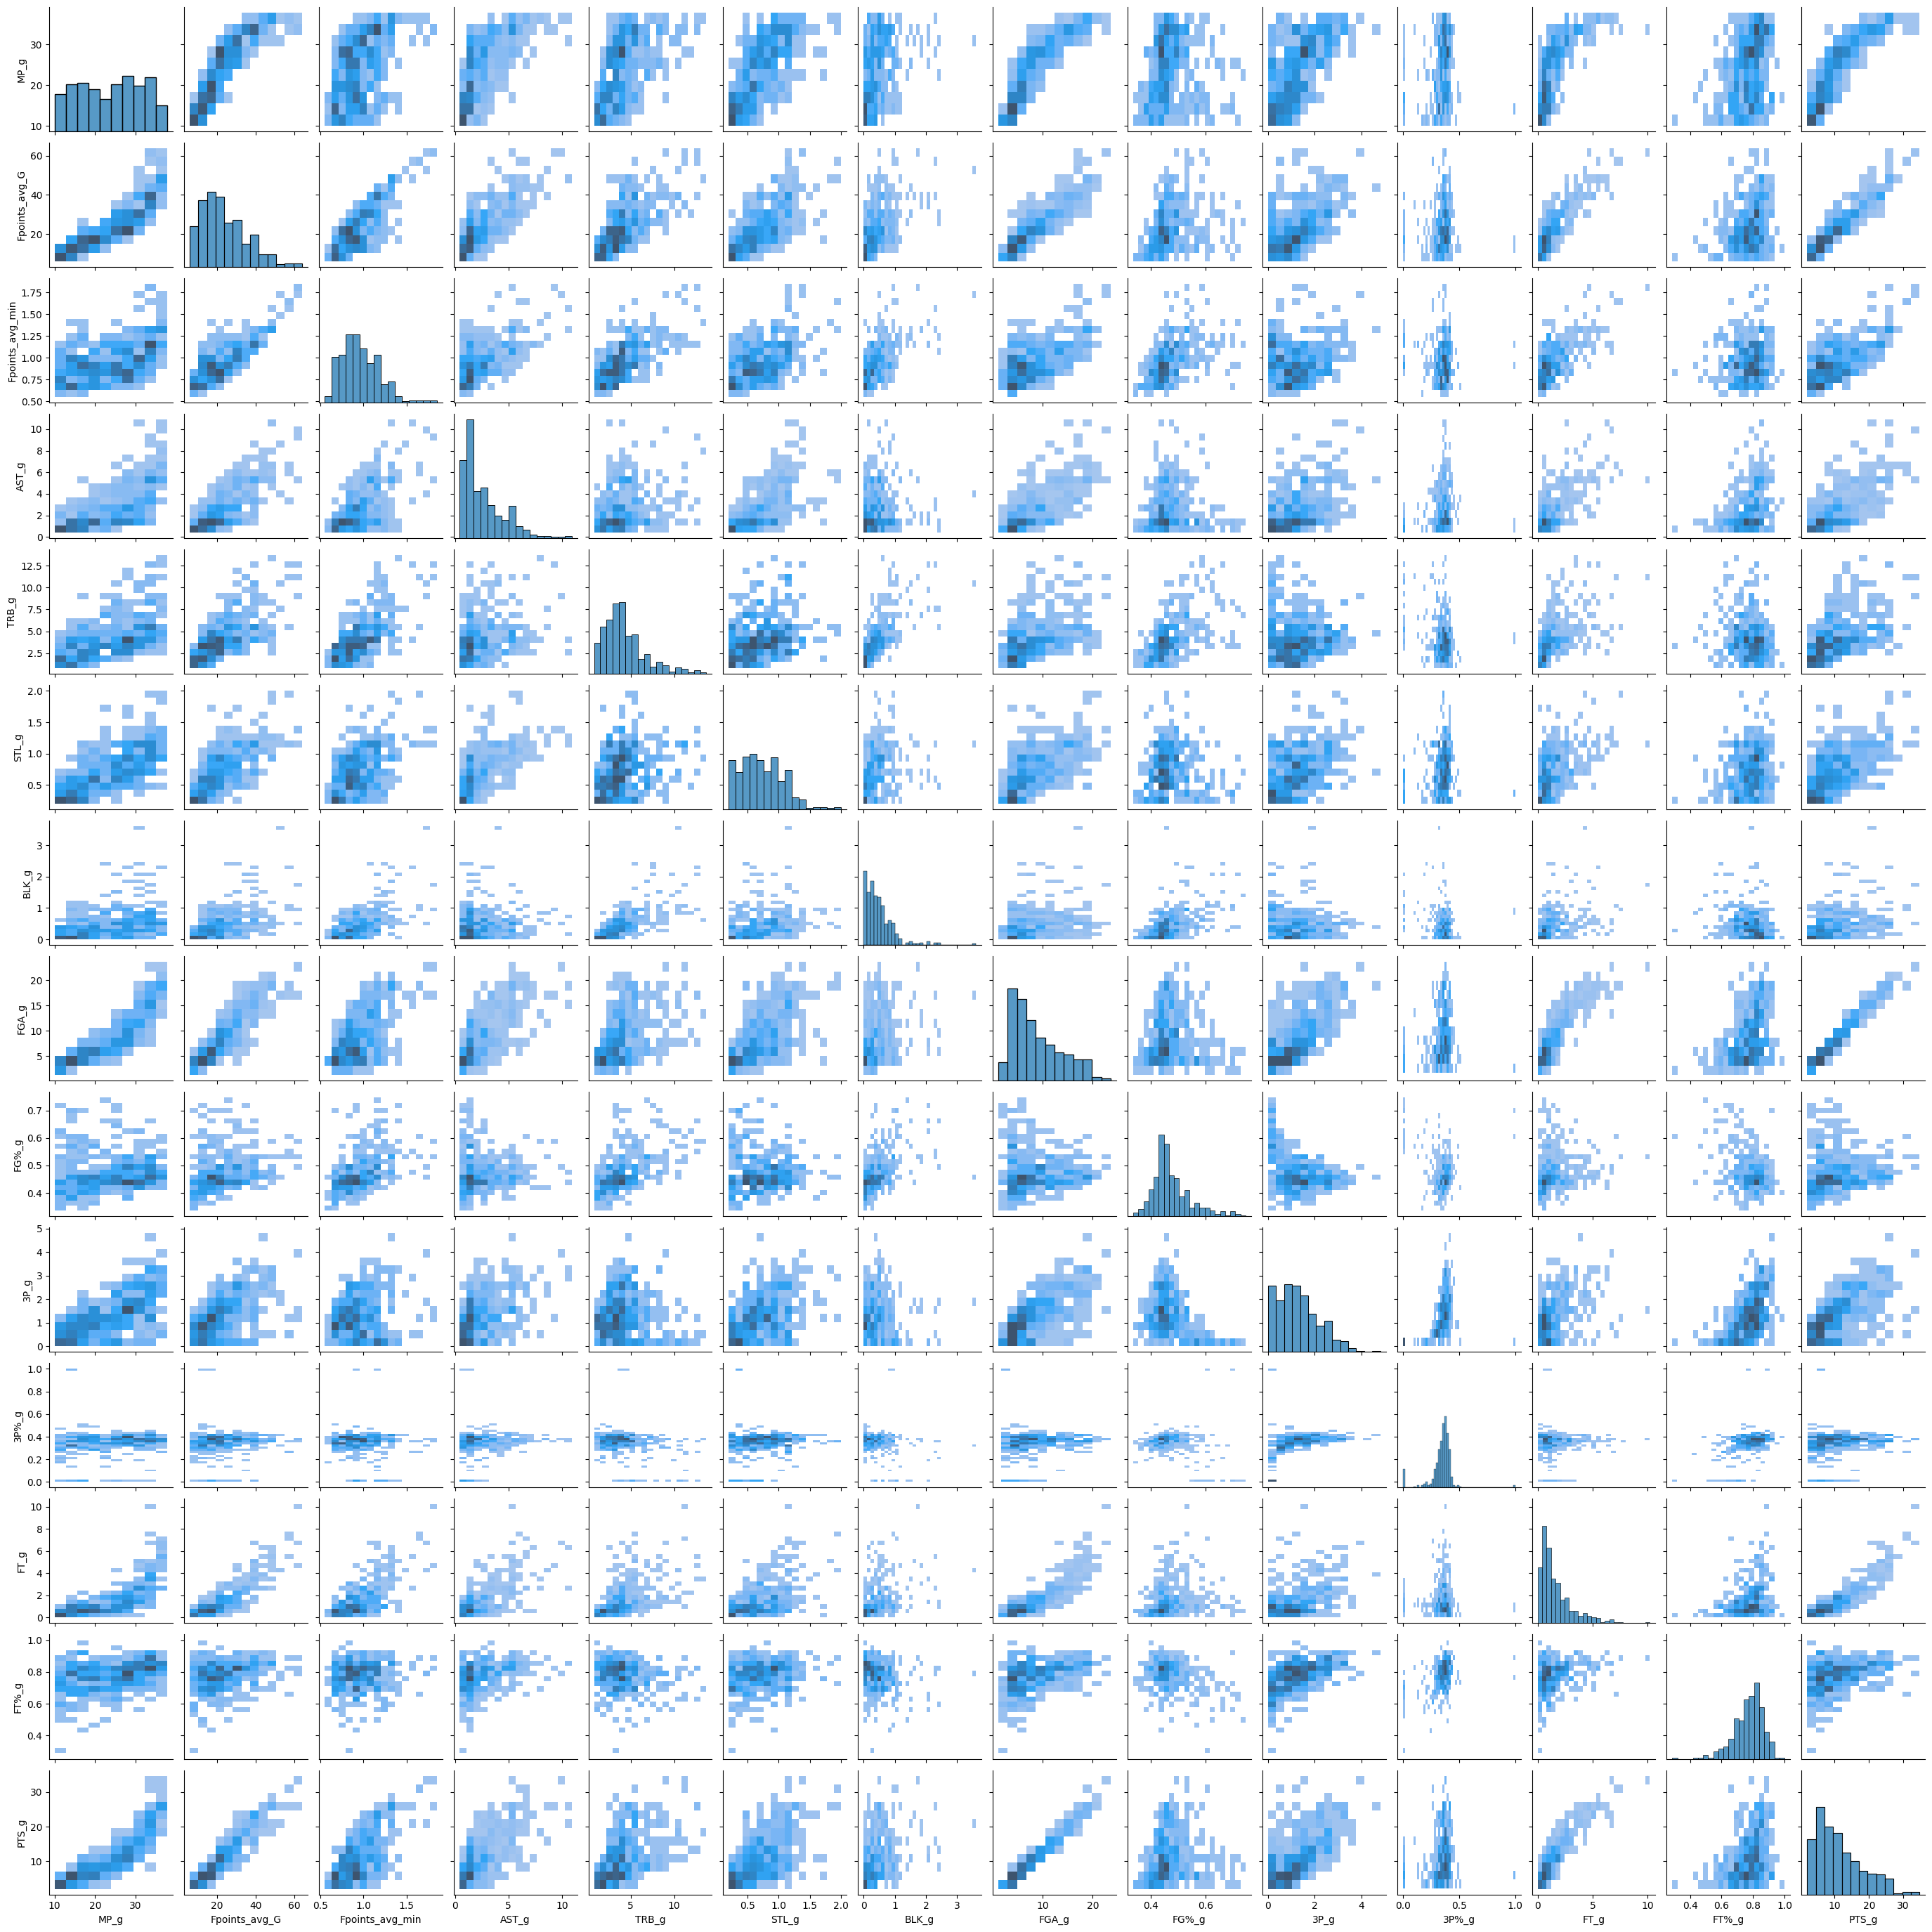

In [25]:
sn.pairplot(base_fantasy, kind='hist', height =2, aspect=1)

array([[<AxesSubplot: title={'center': 'MP_g'}>,
        <AxesSubplot: title={'center': 'Fpoints_avg_G'}>,
        <AxesSubplot: title={'center': 'Fpoints_avg_min'}>,
        <AxesSubplot: title={'center': 'AST_g'}>],
       [<AxesSubplot: title={'center': 'TRB_g'}>,
        <AxesSubplot: title={'center': 'STL_g'}>,
        <AxesSubplot: title={'center': 'BLK_g'}>,
        <AxesSubplot: title={'center': 'FGA_g'}>],
       [<AxesSubplot: title={'center': 'FG%_g'}>,
        <AxesSubplot: title={'center': '3P_g'}>,
        <AxesSubplot: title={'center': '3P%_g'}>,
        <AxesSubplot: title={'center': 'FT_g'}>],
       [<AxesSubplot: title={'center': 'FT%_g'}>,
        <AxesSubplot: title={'center': 'PTS_g'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

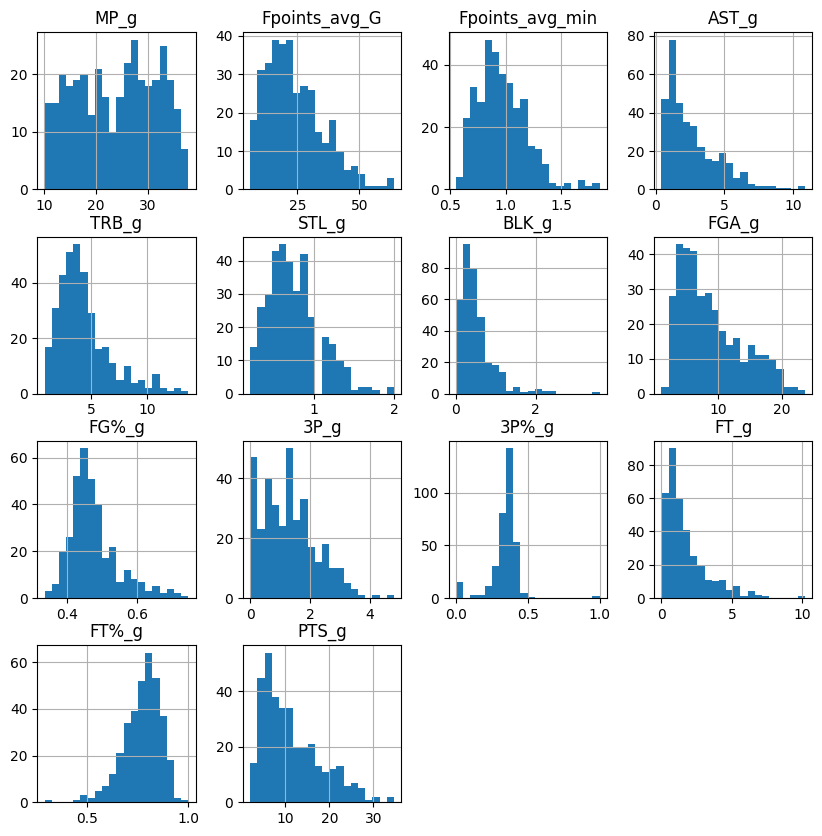

In [26]:
base_fantasy.hist(bins=20, figsize=(10,10))

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_4052/1438359253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(base_fantasy.corr(), annot=True, vmin = -1, vmax = 1)


<AxesSubplot: >

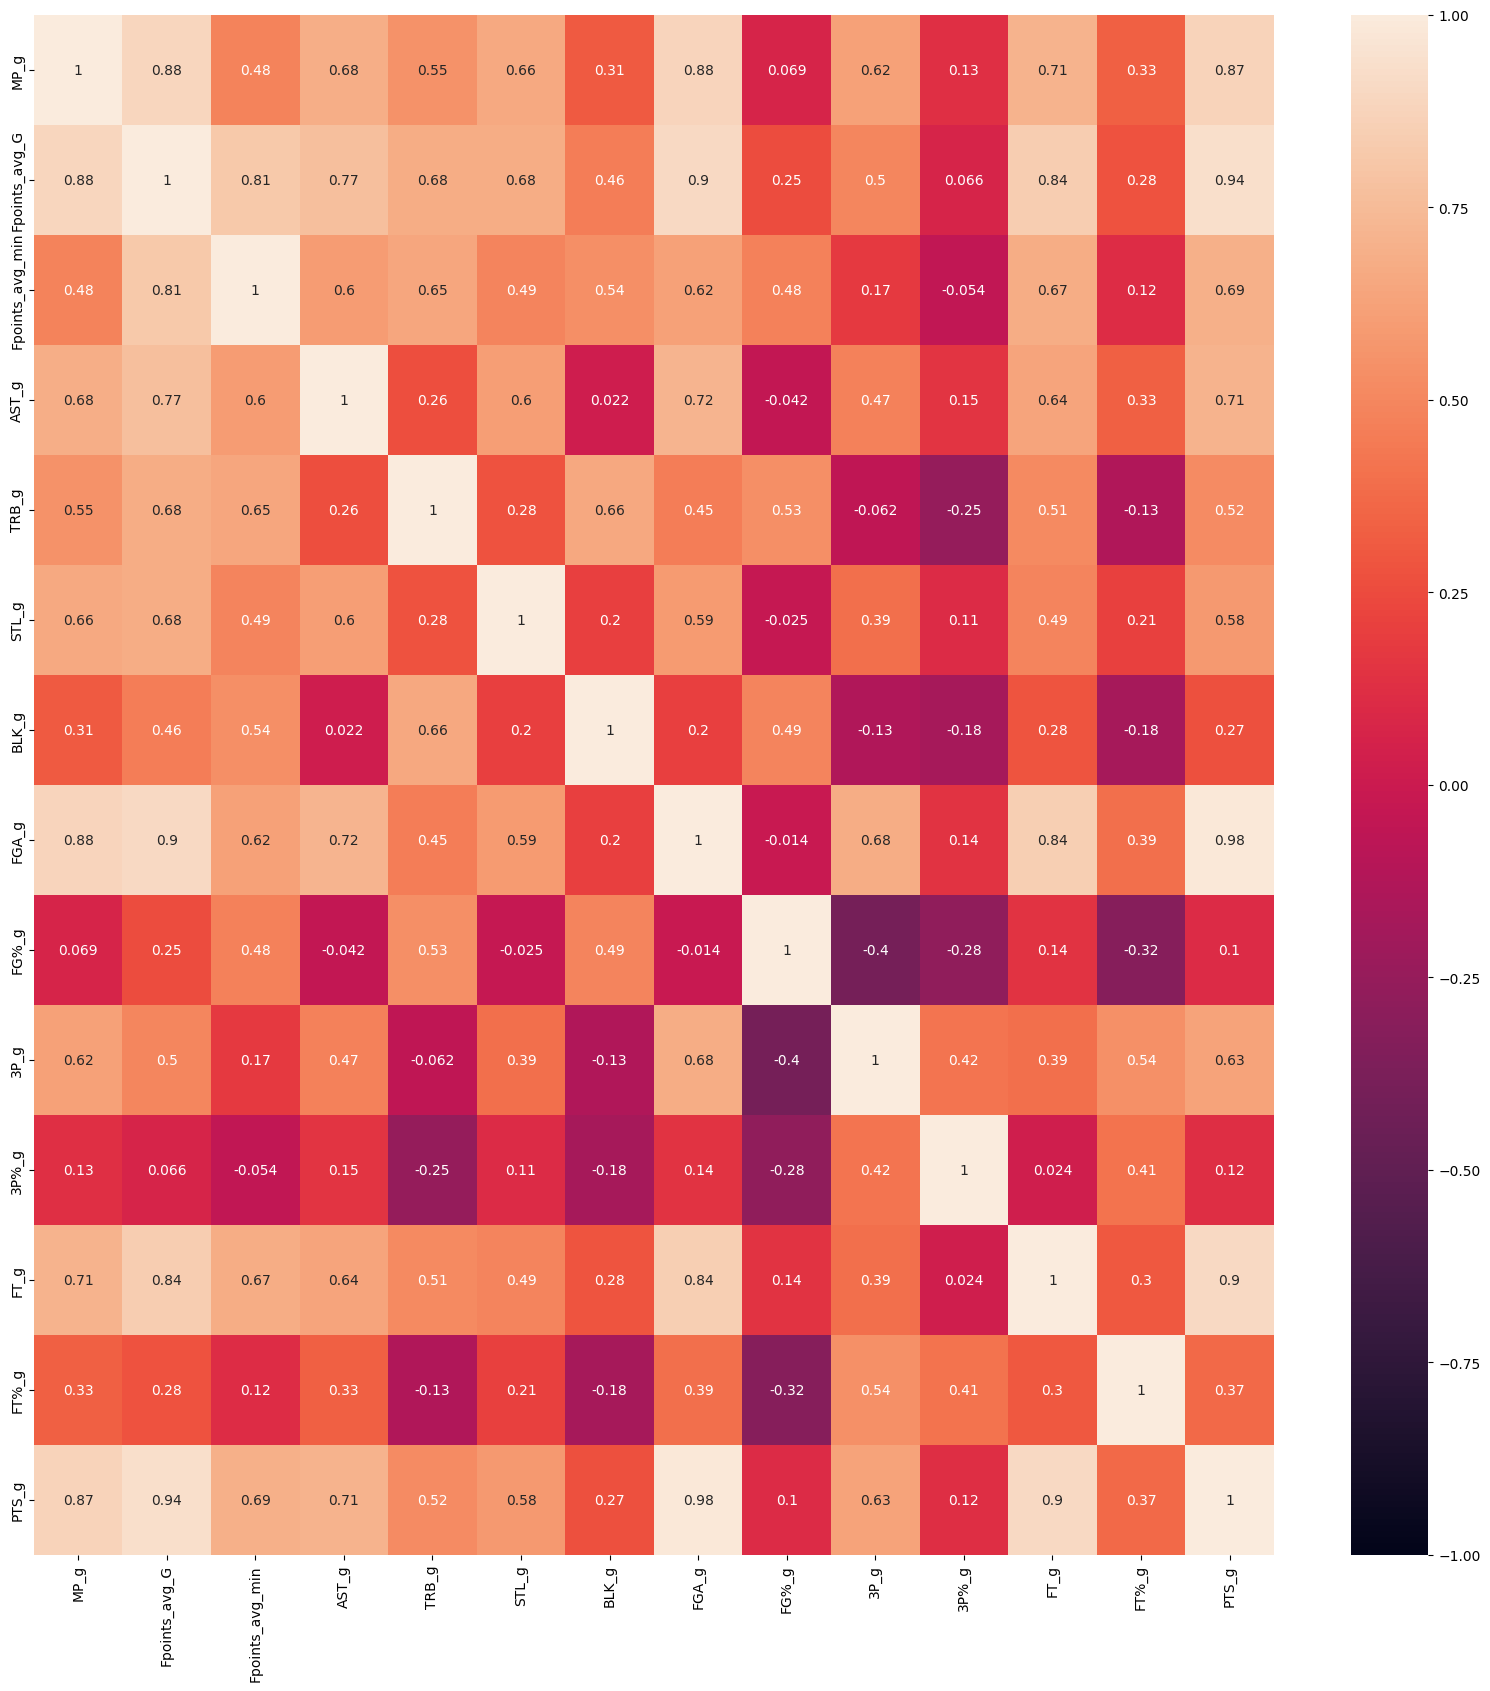

In [27]:
plt.figure(figsize=(20,20))
sn.heatmap(base_fantasy.corr(), annot=True, vmin = -1, vmax = 1)

In [36]:
# Looking into the best 25% of fantasy producers:
top_fantasy = base_fantasy[base_fantasy['Fpoints_avg_G'] > base_fantasy['Fpoints_avg_G'].quantile(0.75)]
top_fantasy

,Player,MP_g,Fpoints_avg_G,Fpoints_avg_min,AST_g,TRB_g,STL_g,BLK_g,FGA_g,FG%_g,3P_g,3P%_g,FT_g,FT%_g,PTS_g
0,Joel Embiid,33.6,62.1,1.848214,5.6,11.0,1.2,1.7,21.8,0.529,1.4,0.388,10.2,0.883,34.7
1,Luka Dončić,37.5,63.9,1.704000,9.8,9.2,1.4,0.5,23.6,0.487,4.1,0.382,6.8,0.786,33.9
2,Giannis Antetokounmpo,35.2,58.3,1.656250,6.5,11.5,1.2,1.1,18.8,0.611,0.5,0.274,7.0,0.657,30.4
3,Shai Gilgeous-Alexander,34.0,56.8,1.670588,6.2,5.5,2.0,0.9,19.8,0.535,1.3,0.353,7.6,0.874,30.1
4,Jalen Brunson,35.4,46.2,1.305085,6.7,3.6,0.9,0.2,21.4,0.479,2.7,0.401,5.5,0.847,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Clint Capela,25.8,31.0,1.201550,1.2,10.6,0.6,1.5,8.5,0.571,0.0,0.000,1.8,0.631,11.5
232,Jakob Poeltl,26.4,32.0,1.212121,2.5,8.6,0.7,1.5,7.6,0.656,0.0,NaN,1.2,0.551,11.1
234,Daniel Gafford,24.5,33.9,1.383673,1.6,7.6,0.9,2.1,6.5,0.725,0.0,NaN,1.6,0.674,11.0
248,Jusuf Nurkić,27.3,33.3,1.219780,4.0,11.0,1.1,1.1,8.3,0.510,0.3,0.244,2.2,0.640,10.9


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_4052/2189158542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(top_fantasy.corr(), annot=True, vmin = -1, vmax = 1)


<AxesSubplot: >

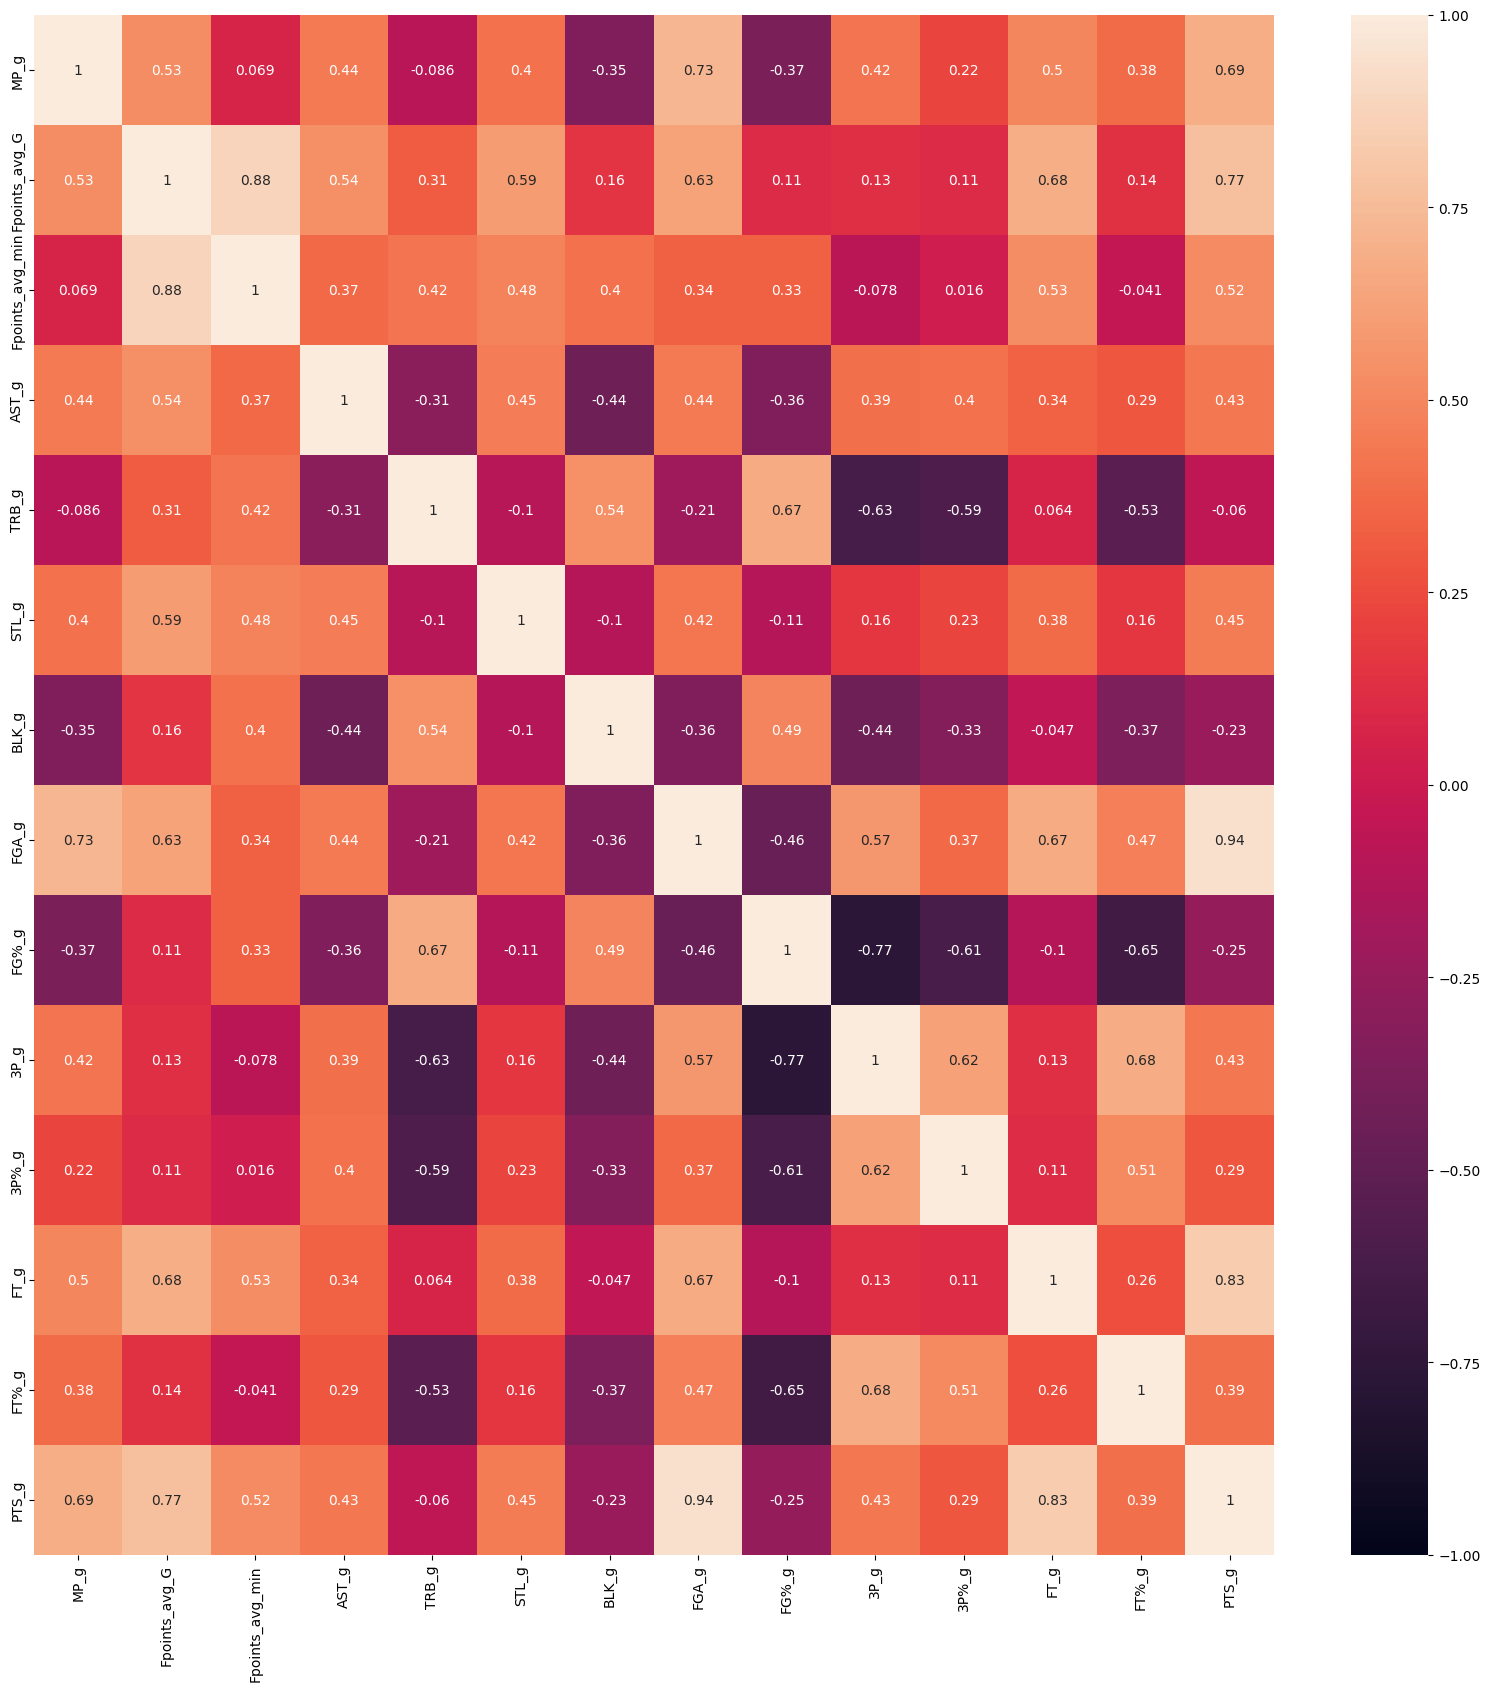

In [37]:
plt.figure(figsize=(20,20))
sn.heatmap(top_fantasy.corr(), annot=True, vmin = -1, vmax = 1)

In [38]:
top_fantasy.sort_values(by = 'BLK_g', ascending=False).head(20)

,Player,MP_g,Fpoints_avg_G,Fpoints_avg_min,AST_g,TRB_g,STL_g,BLK_g,FGA_g,FG%_g,3P_g,3P%_g,FT_g,FT%_g,PTS_g
46,Victor Wembanyama,29.7,51.2,1.723906,3.9,10.6,1.2,3.6,16.7,0.465,1.8,0.325,4.1,0.796,21.4
193,Brook Lopez,30.5,31.7,1.039344,1.6,5.2,0.5,2.4,9.6,0.485,1.9,0.366,1.4,0.821,12.5
18,Anthony Davis,35.5,55.1,1.552113,3.5,12.6,1.2,2.3,16.9,0.556,0.4,0.271,5.5,0.816,24.7
111,Chet Holmgren,29.4,39.3,1.336735,2.4,7.9,0.6,2.3,11.6,0.530,1.6,0.370,2.7,0.793,16.5
161,Rudy Gobert,34.1,38.2,1.120235,1.3,12.9,0.7,2.1,8.1,0.661,0.0,0.000,3.3,0.638,14.0
234,Daniel Gafford,24.5,33.9,1.383673,1.6,7.6,0.9,2.1,6.5,0.725,0.0,NaN,1.6,0.674,11.0
213,Nic Claxton,29.8,35.0,1.174497,2.1,9.9,0.6,2.1,8.2,0.629,0.0,0.200,1.5,0.551,11.8
64,Kristaps Porziņģis,29.6,40.0,1.351351,2.0,7.2,0.7,1.9,13.2,0.516,1.9,0.375,4.5,0.858,20.1
96,Myles Turner,27.0,34.6,1.281481,1.3,6.9,0.5,1.9,11.8,0.524,1.5,0.358,3.2,0.773,17.1
0,Joel Embiid,33.6,62.1,1.848214,5.6,11.0,1.2,1.7,21.8,0.529,1.4,0.388,10.2,0.883,34.7
